# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Setup query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#Create Lists for Data
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Setup count
count = 0
set_count = 1

#loop to create dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count > 48:
            count = 1
            set_count += 1
            city_list.append(city)
        else:
            count += 1
            city_list.append(city)
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except:
        print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | aswan
Processing Record 5 of Set 1 | poum
Processing Record 6 of Set 1 | alta floresta
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | sinnamary
Processing Record 10 of Set 1 | srednekolymsk
Processing Record 11 of Set 1 | tadine
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | vostok
Processing Record 14 of Set 1 | gogrial
City not found. Skipping...
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | rantauprapat
Processing Record 17 of Set 1 | druzhba
Processing Record 18 of Set 1 | port said
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | vila velha
Processing Record 23 of Set 1 | jijiga
Processing Record 24 of Set 1 | punta a

City not found. Skipping...
Processing Record 42 of Set 4 | korcula
Processing Record 43 of Set 4 | bambanglipuro
Processing Record 44 of Set 4 | viedma
Processing Record 45 of Set 4 | cururupu
Processing Record 46 of Set 4 | bayji
Processing Record 47 of Set 4 | dangriga
Processing Record 48 of Set 4 | coroneo
Processing Record 49 of Set 4 | hami
Processing Record 1 of Set 5 | rorvik
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | tsiroanomandidy
Processing Record 4 of Set 5 | chernyshevskiy
Processing Record 5 of Set 5 | dongzhen
Processing Record 6 of Set 5 | dawei
Processing Record 7 of Set 5 | coihaique
Processing Record 8 of Set 5 | muriwai beach
Processing Record 9 of Set 5 | upernavik
Processing Record 10 of Set 5 | auki
Processing Record 11 of Set 5 | bow island
Processing Record 12 of Set 5 | verkhnyaya khava
Processing Record 13 of Set 5 | kralendijk
Processing Record 14 of Set 5 | sakakah
Processing Record 15 of Set 5 | tuatapere
Processing Record 16 

Processing Record 32 of Set 8 | acajutla
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | pravdinsk
Processing Record 35 of Set 8 | san quintin
Processing Record 36 of Set 8 | praya
Processing Record 37 of Set 8 | linqiong
Processing Record 38 of Set 8 | jacala
Processing Record 39 of Set 8 | kumba
Processing Record 40 of Set 8 | huron
Processing Record 41 of Set 8 | samarai
City not found. Skipping...
Processing Record 42 of Set 8 | artemisa
Processing Record 43 of Set 8 | beloha
Processing Record 44 of Set 8 | troitsk
Processing Record 45 of Set 8 | belaya gora
Processing Record 46 of Set 8 | kismayo
Processing Record 47 of Set 8 | aleksandrov gay
Processing Record 48 of Set 8 | along
Processing Record 49 of Set 8 | yaring
Processing Record 1 of Set 9 | lynchburg
Processing Record 2 of Set 9 | oksfjord
Processing Record 3 of Set 9 | horasan
Processing Record 4 of Set 9 | norrtalje
Processing Record 5 of Set 9 | lokomotivnyy
City not found. Skipping...
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dictionary for DataFrame
weather_dict = {"City": city_list,
               "Latitude": lat,
               "Longitute": lng,
               "Max Temp.": max_temp,
               "Humidity": humidity,
               "Cloudiness": cloudiness,
               "Wind Speed": wind_speed,
               "Country": country,
               "Date": date}

#Create DataFrame
weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Latitude,Longitute,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,84.20,70,20,11.50,CK,1612669768
1,faanui,-16.4833,-151.7500,82.71,67,1,8.75,PF,1612669930
2,qaanaaq,77.4840,-69.3632,12.47,91,100,5.66,GL,1612669943
3,aswan,24.0934,32.9070,55.00,66,0,5.68,EG,1612670511
4,poum,-20.2333,164.0167,80.89,67,0,6.96,NC,1612669974


In [7]:
#Export to csv file
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
test_data = weather_df["Humidity"].describe(include = "all")
test_data

#No reason to go on since there are no cities that have humidity > 100%

count    536.000000
mean      74.236940
std       19.137813
min       19.000000
25%       63.000000
50%       79.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

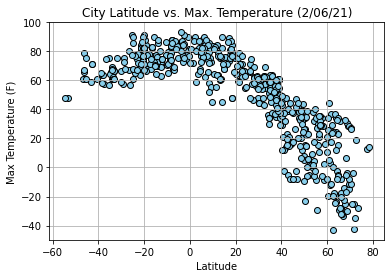

In [28]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp."], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Max. Temperature (2/06/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Figures/latitude_tempeture_plot.png")

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression